In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook
import load_raw as Raw
from sklearn.linear_model import LinearRegression

# Laad de data in
Bestand Cat3_pat36_meting1_oef4.csv als voorbeeld van DATA

In [2]:
df_cleaned = pd.read_csv('/data/ortho/Cat3_pat36_meting1_oef4.csv', header=None)

df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

# Hoe ziet de data er nu uit
Wordt niet gebruikt later

<IPython.core.display.Javascript object>


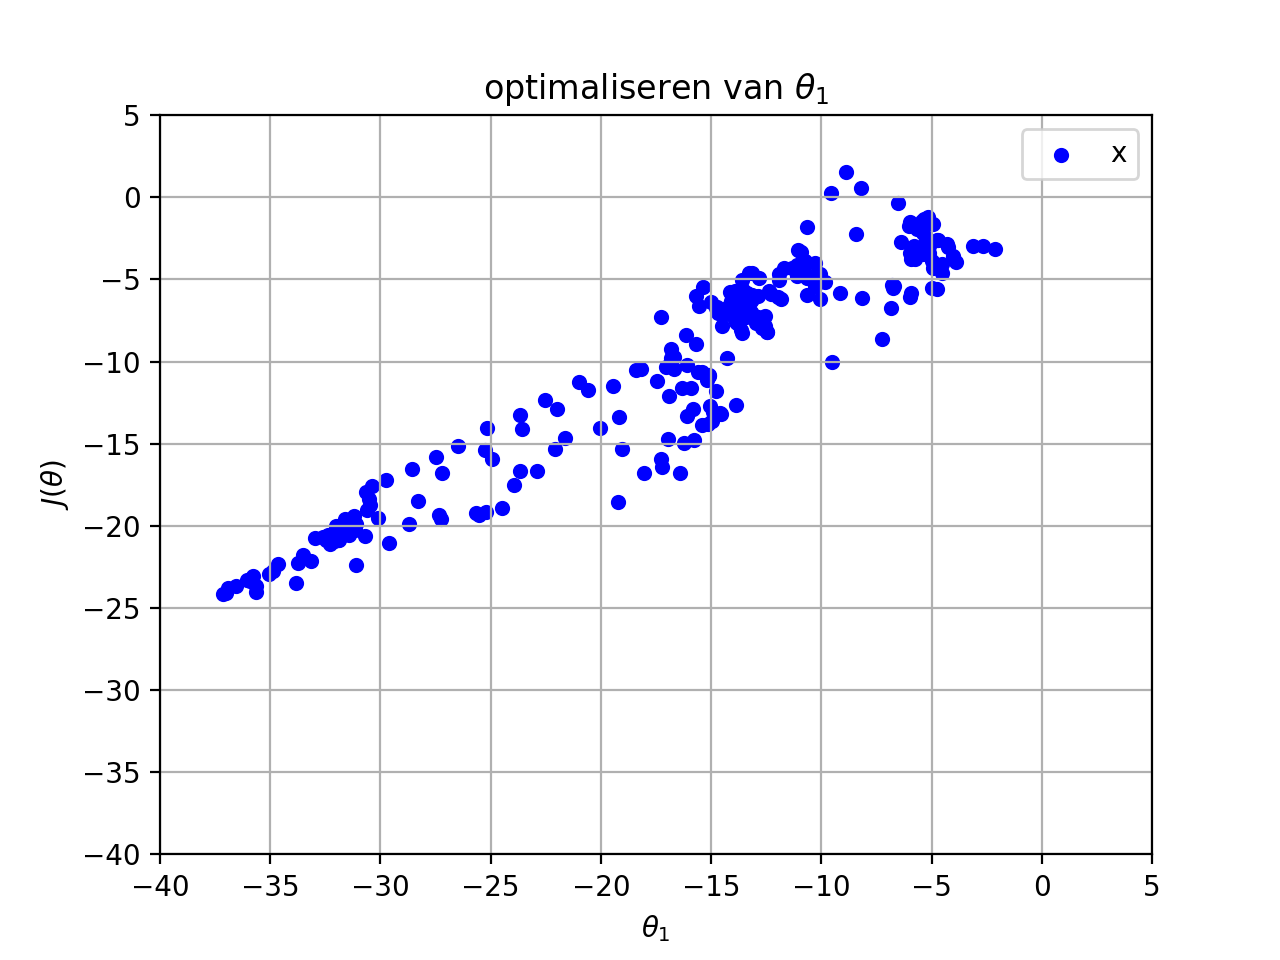

In [3]:
# ax1 = df_cleaned.plot.scatter(x='clavicula_r_x', y='clavicula_l_x',  c='blue', label='x')
# ax1.set_xlim(-40,5)
# ax1.set_ylim(-40,5)
# ax1.legend()
# ax1.grid()

# Regression zone
In de volgende 3 cellen wordt de regressie gemaakt

In [15]:
# Wordt met .copy() gekopieerd ipv verwezen
data = df_cleaned[['clavicula_r_x', 'clavicula_l_x']].copy()

lr = LinearRegression()
lr.fit(data[['clavicula_r_x']], data['clavicula_l_x'])
# lr.intercept_, lr.coef_ # hiermee wordt theta gevuld

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
data['bias'] = 1
theta = np.matrix([lr.intercept_, lr.coef_[0]]).T
# print(data)
X = np.matrix(data[['bias', 'clavicula_r_x']])
y = np.matrix(data[['clavicula_l_x']])
costs = []
for rico in range(-157,139):
    theta[1] = rico
    yh = X * theta
    d = yh - y
    j = d.T * d
    costs.append(j[0,0])
print(len(costs))
# plt.plot(range(-157,139), costs)
# plt.title(r'optimaliseren van $\theta_1$')
# plt.ylabel(r'$J(\theta)$')
# plt.xlabel(r'$\theta_1$')

296


<IPython.core.display.Javascript object>


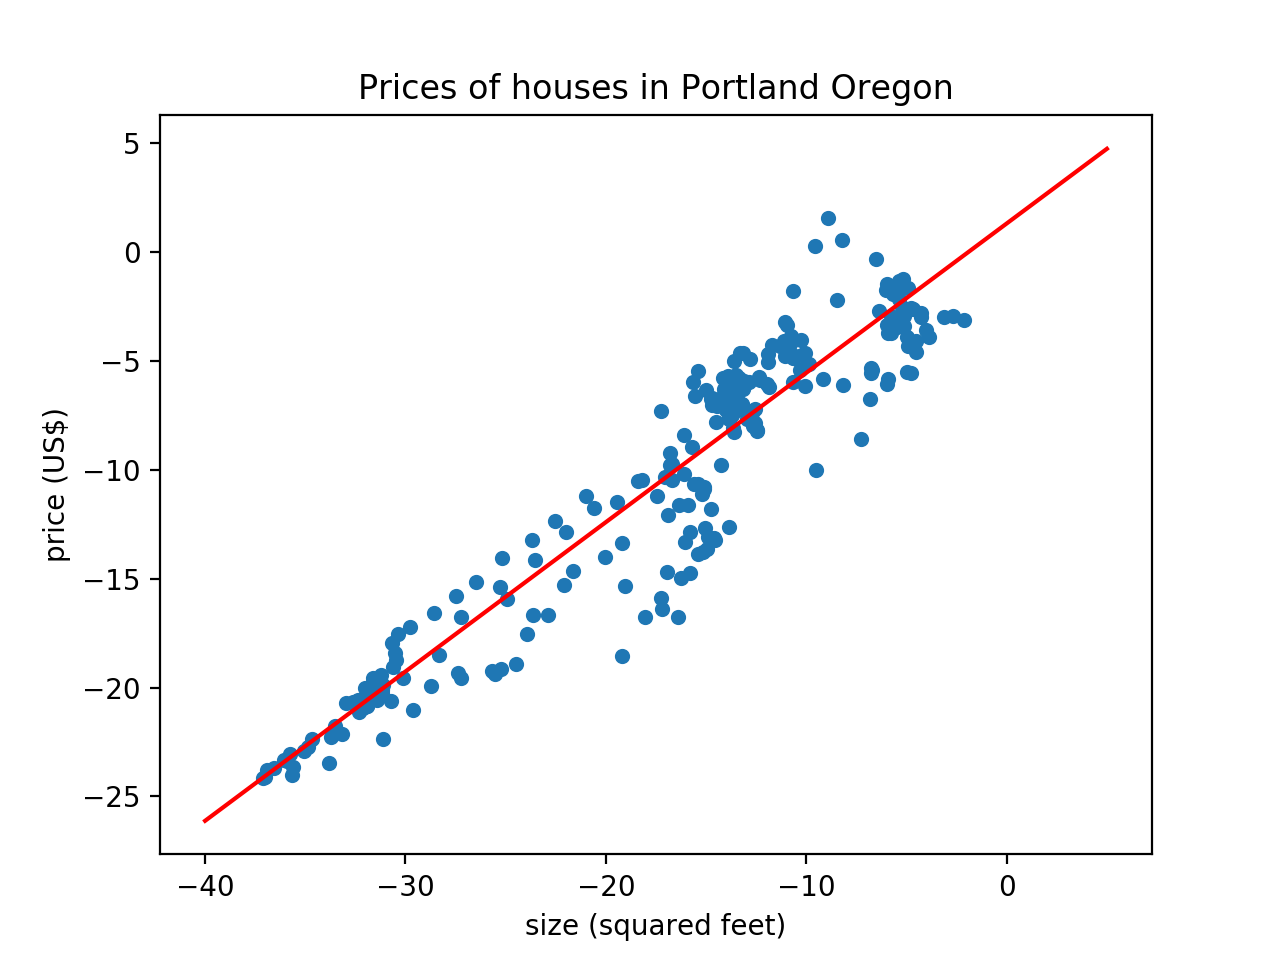

In [17]:
data.plot.scatter(x='clavicula_r_x', y='clavicula_l_x')
plt.title('Prices of houses in Portland Oregon')
plt.xlabel('size (squared feet)')
plt.ylabel('price (US$)')
line_x = np.matrix([[1, -40], [1 ,5]]) # 1 in de eerste kolom is de bias
theta = np.matrix([lr.intercept_, lr.coef_[0]]).T
line_y = line_x * theta
plt.plot(line_x[:, 1], line_y, '-', color='red')